# **Notebook 2: Data Cleaning**

## Objectives

* Identify and handle missing values across both datasets.
* Detect and address outliers to ensure data integrity.
* Remove duplicates and inconsistencies within the datasets.
* Standardize formatting and data types for compatibility.
* Save the cleaned datasets for further analysis and modeling.
* Document the cleaning process for reproducibility and transparency.

## Inputs

* **Raw Datasets**:
  * `house_prices_records.csv`: Contains house attribute data and sale prices for properties in Ames, Iowa.
  * `inherited_houses.csv`: Contains attributes of four inherited properties but excludes sale prices.
* **Saved Location**:
  * Raw datasets are located in `outputs/datasets/raw/`.

## Outputs

* **Cleaned Datasets**:
  * `cleaned_house_prices_records.csv`: Cleaned version of the house prices dataset.
  * `cleaned_inherited_houses.csv`: Cleaned version of the inherited houses dataset.
* **Documentation**:
  * A summary of the cleaning process, including handling of missing values, outliers, and duplicates.
  * Cleaned datasets saved in `outputs/datasets/cleaned/`.

## Additional Comments

* This notebook adheres to the CRISP-DM methodology's Data Preparation step.
* Cleaning decisions (e.g., imputation methods, outlier handling) are based on data characteristics and domain knowledge.
* The cleaned datasets will be ready for downstream tasks such as correlation analysis, feature engineering, and model training in subsequent notebooks.


---

# Change working directory

* It is assumed that you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Predictive-Analytics-PP5/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Predictive-Analytics-PP5'

---

# Import Packages & Set Environment Variables

* First you will need to import the numpy and pandas packages, and set the environment variables by running the following:

In [4]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from ydata_profiling import ProfileReport
from feature_engine.imputation import ArbitraryNumberImputer, CategoricalImputer
from sklearn.pipeline import Pipeline

# Load Collected Data

* Now that we have the required packages and environment variables set, you need to load the data previously downloaded (please see the Data Collection notebook).

In [5]:
# Quick file existence check
assert os.path.exists("inputs/dataset/raw/house-price-20211124T154130Z-001/house-price/house_prices_records.csv"), \
    "File not found: house_prices_records.csv"
assert os.path.exists("inputs/dataset/raw/house-price-20211124T154130Z-001/house-price/inherited_houses.csv"), \
    "File not found: inherited_houses.csv"

# Load the datasets
df = pd.read_csv("inputs/dataset/raw/house-price-20211124T154130Z-001/house-price/house_prices_records.csv")
df_inherited = pd.read_csv("inputs/dataset/raw/house-price-20211124T154130Z-001/house-price/inherited_houses.csv")

# Display shapes
print(f"House Prices Dataset Shape: {df.shape}")
print(f"Inherited House Dataset Shape: {df_inherited.shape}")

# Preview Datasets
print("\nPreview of House Prices Dataset:")
display(df.head())
print("\nPreview of Inherited Houses Dataset:")
display(df_inherited.head())

# Check for missing values
print("\nMissing Values in Prices Dataset (Absolute & Percentage):")
missing_df = pd.DataFrame({
    "Missing Values": df.isnull().sum(),
    "Percentage": (df.isnull().sum() / len(df) * 100).round(2)
})
if missing_df["Missing Values"].any():
    display(missing_df[missing_df["Missing Values"] > 0])
else:
    print("No missing values in the House Prices Dataset.")

print("\nMissing Values in Inherited Houses Dataset (Absolute & Percentage):")
missing_inherited_df = pd.DataFrame({
    "Missing Values": df_inherited.isnull().sum(),
    "Percentage": (df_inherited.isnull().sum() / len(df_inherited) * 100).round(2)
})
if missing_inherited_df["Missing Values"].any():
    display(missing_inherited_df[missing_inherited_df["Missing Values"] > 0])
else:
    print("No missing values in the Inherited Houses Dataset.")

# Display Data Types
print("\nData Types in Prices Dataset:")
print(df.dtypes)
print("\nData Types in Inherited Houses Dataset:")
print(df_inherited.dtypes)

# Summary Statistics
print("\nSummary Statistics for House Prices Dataset:")
display(df.describe())
print("\nSummary Statistics for Inherited Houses Dataset:")
display(df_inherited.describe())

# Summary for Categorical Variables
print("\nCategorical Summary for House Prices Dataset:")
display(df.select_dtypes(include=['object']).describe())

House Prices Dataset Shape: (1460, 24)
Inherited House Dataset Shape: (4, 23)

Preview of House Prices Dataset:


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,GarageYrBlt,GrLivArea,KitchenQual,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,2003.0,1710,Gd,8450,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,1976.0,1262,TA,9600,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,2001.0,1786,Gd,11250,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,1998.0,1717,Gd,9550,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,2000.0,2198,Gd,14260,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000



Preview of Inherited Houses Dataset:


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,GarageYrBlt,GrLivArea,KitchenQual,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd
0,896,0,2,No,468.0,Rec,270.0,0,730.0,Unf,1961.0,896,TA,11622,80.0,0.0,0,6,5,882.0,140,1961,1961
1,1329,0,3,No,923.0,ALQ,406.0,0,312.0,Unf,1958.0,1329,Gd,14267,81.0,108.0,36,6,6,1329.0,393,1958,1958
2,928,701,3,No,791.0,GLQ,137.0,0,482.0,Fin,1997.0,1629,TA,13830,74.0,0.0,34,5,5,928.0,212,1997,1998
3,926,678,3,No,602.0,GLQ,324.0,0,470.0,Fin,1998.0,1604,Gd,9978,78.0,20.0,36,6,6,926.0,360,1998,1998



Missing Values in Prices Dataset (Absolute & Percentage):


,Missing Values,Percentage
2ndFlrSF,86,5.89
BedroomAbvGr,99,6.78
BsmtFinType1,114,7.81
EnclosedPorch,1324,90.68
GarageFinish,162,11.10
GarageYrBlt,81,5.55
LotFrontage,259,17.74
MasVnrArea,8,0.55
WoodDeckSF,1305,89.38



Missing Values in Inherited Houses Dataset (Absolute & Percentage):
No missing values in the Inherited Houses Dataset.

Data Types in Prices Dataset:
1stFlrSF           int64
2ndFlrSF         float64
BedroomAbvGr     float64
BsmtExposure      object
BsmtFinSF1         int64
BsmtFinType1      object
BsmtUnfSF          int64
EnclosedPorch    float64
GarageArea         int64
GarageFinish      object
GarageYrBlt      float64
GrLivArea          int64
KitchenQual       object
LotArea            int64
LotFrontage      float64
MasVnrArea       float64
OpenPorchSF        int64
OverallCond        int64
OverallQual        int64
TotalBsmtSF        int64
WoodDeckSF       float64
YearBuilt          int64
YearRemodAdd       int64
SalePrice          int64
dtype: object

Data Types in Inherited Houses Dataset:
1stFlrSF           int64
2ndFlrSF           int64
BedroomAbvGr       int64
BsmtExposure      object
BsmtFinSF1       float64
BsmtFinType1      object
BsmtUnfSF        float64
EnclosedPorch      

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
count,1460.000000,1374.000000,1361.000000,1460.000000,1460.000000,136.000000,1460.000000,1379.000000,1460.000000,1460.000000,1201.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,155.000000,1460.000000,1460.000000,1460.000000
mean,1162.626712,348.524017,2.869214,443.639726,567.240411,25.330882,472.980137,1978.506164,1515.463699,10516.828082,70.049958,103.685262,46.660274,5.575342,6.099315,1057.429452,103.741935,1971.267808,1984.865753,180921.195890
std,386.587738,438.865586,0.820115,456.098091,441.866955,66.684115,213.804841,24.689725,525.480383,9981.264932,24.284752,181.066207,66.256028,1.112799,1.382997,438.705324,135.543152,30.202904,20.645407,79442.502883
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,334.000000,1300.000000,21.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1872.000000,1950.000000,34900.000000
25%,882.000000,0.000000,2.000000,0.000000,223.000000,0.000000,334.500000,1961.000000,1129.500000,7553.500000,59.000000,0.000000,0.000000,5.000000,5.000000,795.750000,0.000000,1954.000000,1967.000000,129975.000000
50%,1087.000000,0.000000,3.000000,383.500000,477.500000,0.000000,480.000000,1980.000000,1464.000000,9478.500000,69.000000,0.000000,25.000000,5.000000,6.000000,991.500000,0.000000,1973.000000,1994.000000,163000.000000
75%,1391.250000,728.000000,3.000000,712.250000,808.000000,0.000000,576.000000,2002.000000,1776.750000,11601.500000,80.000000,166.000000,68.000000,6.000000,7.000000,1298.250000,182.500000,2000.000000,2004.000000,214000.000000
max,4692.000000,2065.000000,8.000000,5644.000000,2336.000000,286.000000,1418.000000,2010.000000,5642.000000,215245.000000,313.000000,1600.000000,547.000000,9.000000,10.000000,6110.000000,736.000000,2010.000000,2010.000000,755000.000000



Summary Statistics for Inherited Houses Dataset:


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd
count,4.00000,4.000000,4.00,4.000000,4.000000,4.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00,4.00000,4.000000,4.00000,4.000000,4.000000
mean,1019.75000,344.750000,2.75,696.000000,284.250000,0.0,498.500000,1978.500000,1364.500000,12424.250000,78.250000,32.000000,26.500000,5.75,5.50000,1016.250000,276.25000,1978.500000,1978.750000
std,206.68555,398.193734,0.50,201.141741,112.973079,0.0,172.683719,21.977261,340.623448,1999.967062,3.095696,51.536395,17.691806,0.50,0.57735,209.577949,120.18978,21.977261,22.261701
min,896.00000,0.000000,2.00,468.000000,137.000000,0.0,312.000000,1958.000000,896.000000,9978.000000,74.000000,0.000000,0.000000,5.00,5.00000,882.000000,140.00000,1958.000000,1958.000000
25%,918.50000,0.000000,2.75,568.500000,236.750000,0.0,430.500000,1960.250000,1220.750000,11211.000000,77.000000,0.000000,25.500000,5.75,5.00000,915.000000,194.00000,1960.250000,1960.250000
50%,927.00000,339.000000,3.00,696.500000,297.000000,0.0,476.000000,1979.000000,1466.500000,12726.000000,79.000000,10.000000,35.000000,6.00,5.50000,927.000000,286.00000,1979.000000,1979.500000
75%,1028.25000,683.750000,3.00,824.000000,344.500000,0.0,544.000000,1997.250000,1610.250000,13939.250000,80.250000,42.000000,36.000000,6.00,6.00000,1028.250000,368.25000,1997.250000,1998.000000
max,1329.00000,701.000000,3.00,923.000000,406.000000,0.0,730.000000,1998.000000,1629.000000,14267.000000,81.000000,108.000000,36.000000,6.00,6.00000,1329.000000,393.00000,1998.000000,1998.000000



Categorical Summary for House Prices Dataset:


,BsmtExposure,BsmtFinType1,GarageFinish,KitchenQual
count,1460,1346,1298,1460
unique,5,7,4,4
top,No,Unf,Unf,TA
freq,953,396,546,735


# Data Exploration

## Missing Data Exploration

* Next you will explore the dataset, check the variable types and distributing, missing levels, and what value these variables may add in the content of our first business requirement.
* First of all you need to list the variables that are missing a value using the following:

In [6]:
vars_missing_data = df.columns[df.isna().sum() > 0].to_list()


* You then need to run the pandas profiling report using just the var_missing_data variable as follows:

In [7]:
if vars_missing_data:
    print("Variables with Missing Data:")
    print(vars_missing_data)

    print("\nGenerating a profiling report for variables with missing data:")
    pandas_report = ProfileReport(df[vars_missing_data], minimal=True)
    pandas_report.to_notebook_iframe()
else:
    print("Done. There are no variables that are missing data.")

Variables with Missing Data:
['2ndFlrSF', 'BedroomAbvGr', 'BsmtFinType1', 'EnclosedPorch', 'GarageFinish', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'WoodDeckSF']

Generating a profiling report for variables with missing data:


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Assessing Missing Data Levels

* **Purpose**: To gain an understanding of the extend and distribution of the missing data across the dataset.
* **Steps**:
  1. **Identify Variables with Missing Data**:
       * Generate a list of columns that have missing values and their corresponding percentages.
       * Use a profiling report or visualizations to analyze the distribution and patterns of missing data.
  2. **Classify Missing Data**:
       * Categorize missing data as either systematic (e.g., due to a specific condition) or random.
  3. **Visualize Missing Data**:
       * Use heatmaps or bar charts to understand patterns in missing data.

In [11]:
def AssessMissingData(df):
    missing_data_absolute = df.isnull().sum()
    missing_data_percentage = round(missing_data_absolute / len(df) * 100, 2)
    df_missing_data = (pd.DataFrame(
        data={
            "RowsWithMissingData": missing_data_absolute,
            "PercentageOfDataset": missing_data_percentage,
            "DataType": df.dtypes,
        }
    )
    .sort_values(by=['PercentageOfDataset'], ascending=False)
    .query("PercentageOfDataset > 0")
    )
    return df_missing_data

print("\nAssessing Missing Data in House Prices Dataset:")
df_missing_data_summary = AssessMissingData(df)
if not df_missing_data_summary.empty:
    display(df_missing_data_summary)
else:
    print("No missing data detected in the House Prices dataset.")


print("\nAssessing Missing Data in Inherited Houses Dataset:")
df_inherited_missing_data_summary = AssessMissingData(df_inherited)
if not df_inherited_missing_data_summary.empty:
    display(df_inherited_missing_data_summary)
else:
    print("No missing data detected in the Inherited Hosues dataset.")


Assessing Missing Data in House Prices Dataset:


,RowsWithMissingData,PercentageOfDataset,DataType
EnclosedPorch,1324,90.68,float64
WoodDeckSF,1305,89.38,float64
LotFrontage,259,17.74,float64
GarageFinish,162,11.10,object
BsmtFinType1,114,7.81,object
BedroomAbvGr,99,6.78,float64
2ndFlrSF,86,5.89,float64
GarageYrBlt,81,5.55,float64
MasVnrArea,8,0.55,float64



Assessing Missing Data in Inherited Houses Dataset:
No missing data detected in the Inherited Hosues dataset.


#### Results

1. **Variables with Missing Data**:
   * Based on the assessment of missing data, the following variables in the house_prices_records.csv dataset have missing values:

   | Variable      | Missing Rows | Percentage of Dataset | Data Type |
   | ------------- | ------------ | --------------------- | --------- |
   | EnclosedPorch | 1324         | 90.68%                | float64   |
   | WoodDeckSF    | 1305         | 89.38%                | float64   |
   | LotFrontage   | 259          | 17.74%                | float64   |
   | GarageFinish  | 162          | 11.10%                | object    |
   | BsmtFinType1  | 114          | 7.81%                 | object    |
   | BedroomAbvGr  | 99           | 6.78%                 | float64   |
   | 2ndFlrSF      | 86           | 5.89%                 | float64   |
   | GarageYrBlt   | 81           | 5.55%                 | float64   |
   | MasVnrArea    | 8            | 0.55%                 | float64   |

   * **Inherited Houses Dataset:** No missing values were identified, as confirmed by the analysis completed.

2. **Insights from Missing Data Analysis:**
   * Two variables (`EnclosedPorch` and `WoodDeckSF`) exhibit a very high percentage of missing values (>85%), likely warranting removal due to limited utility in analysis or modeling.
   * `LotFrontage` has a moderately high percentage of missing values (~18%) and will require imputation to maintain data integrity.
   * The remaining variables have low-to-moderate levels of missing data (<11%) and will be addressed individually based on their importance and relationship to the target variable.

3. **Additional Alerts from Pandas Profiling:**
   * Several variables also have a significant proportion of zero values, which may indicate meaningful information (e.g., absence of a second floor or porch) rather than missing data:
     * **2ndFlrSF**: 53.5% zeros
     * **MasVnrArea**: 59.0% zeros
     * **WoodDeckSF**: 5.3% zeros
   * These patterns will be considered during the imputation process, ensuring meaningful zeros are not misclassified as missing data.

4. **Next Steps:**
   * **Imputation Strategy:**
     * Variables such as `GarageYrBlt` and `GarageFinish` will likely be imputed conditionally based on related features (e.g., presence of a garage).
     * Numeric variables with moderate missing percentages (e.g., `LotFrontage`, `BsmtFinType1`) will be imputed using median or mode values, depending on their distribution characteristics.
   * **Potential Removal:**
     * Variables with an exceptionally high percentage of missing values (`EnclosedPorch`, `WoodDeckSF`) will be considered for removal, particularly if they exhibit weak correlation with the target variable (`SalePrice`).
   * **Zero Values:**
     * Zero values in features like `2ndFlrSF` and `MasVnrArea` will be evaluated to confirm their relevance (e.g., absence of a second floor) or the need for imputation. Proper interpretation of these values is crucial for feature engineering and modeling.

### Correlation Analysis

The purpose of this section is to:
* Evaluate how the features in the dataset correlate with the target variable (`SalePrice`) to identify strong predictors.
* Assess multicollinearity among features, indentifying pairs of highly correlated features that may require special handling in later steps.
* Use heatmaps and numerical summaries to visualize and summarize relationships, providing insights for feature selection and modelling.

In [8]:
# Calculate correlation matrices

pearson_corr = df.corr(method='pearson')
spearman_corr = df.corr(method='spearman')

# Display top correlations with SalePrice

print("Top Pearson Correlations with SalePrice:")
print(pearson_corr['SalePrice'].sort_values(ascending=False).head(10))

print("\nTop Spearman Correlations with SalePrice:")
print(spearman_corr['SalePrice'].sort_values(ascending=False).head(10))

Top Pearson Correlations with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Name: SalePrice, dtype: float64

Top Spearman Correlations with SalePrice:
SalePrice       1.000000
OverallQual     0.809829
GrLivArea       0.731310
YearBuilt       0.652682
GarageArea      0.649379
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
YearRemodAdd    0.571159
OpenPorchSF     0.477561
Name: SalePrice, dtype: float64


### Results from Correlation Calculations

1. **Top Pearson Correlations with `SalePrice`:**
   - The strongest positive correlations:
     - `OverallQual`: 0.79 (strong linear relationship with `SalePrice`).
     - `GrLivArea`: 0.71 (moderate positive correlation).
     - `GarageCars`: 0.62 (moderate positive correlation).
   - Other notable correlations:
     - `TotalBsmtSF`: 0.61
     - `1stFlrSF`: 0.61
     - `YearBuilt`: 0.52
     - `YearRemodAdd`: 0.51
     - `GarageYrBlt`: 0.49
     - `MasVnrArea`: 0.48

2. **Top Spearman Correlations with `SalePrice`:**
   - The strongest rank-based correlations:
     - `OverallQual`:0.81 (strong monotonic relationship with `SalePrice`).
     - `GrLivArea`: 0.73 (moderate rank-based correlation).
     - `YearBuilt`: 0.65 (moderate positive correlation).
     - `GarageArea`: 0.65
   - Other notable correlations:
     - `TotalBsmtSF`: 0.60
     - `GarageYrBlt`: 0.59
     - `1stFlrSF`: 0.58
     - `YearRemodAdd`: 0.57
     - `OpenPorchSF`: 0.48

3. **Interpretation:**
   - `OverallQual` consistently demonstrates the strongesxt corrrelation with `SalePrice` across both Pearson and Spearman methods, making it a key predictive feature.
   - `GrLivArea` also shows a strong relationship, indicating the importance of the total living area.
   - Variables like `GarageArea`, `TOtalBsmtSF`, and `1stFlrSF` exhibit moderate correlations, confirming their relevance for predictive modelling.
   - Temporal features (`YearBuilt`, `YearRemodAdd`) also have moderate correlations, suggesting newer properties are likely valued higher.

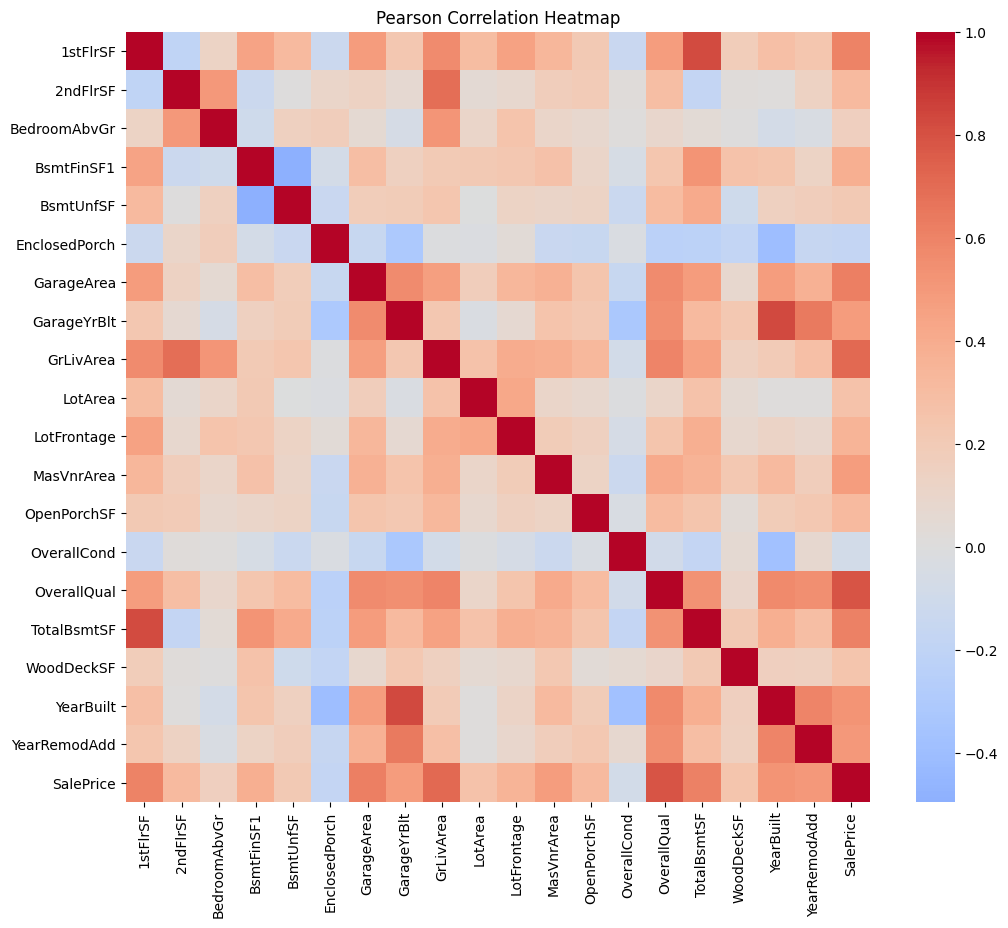

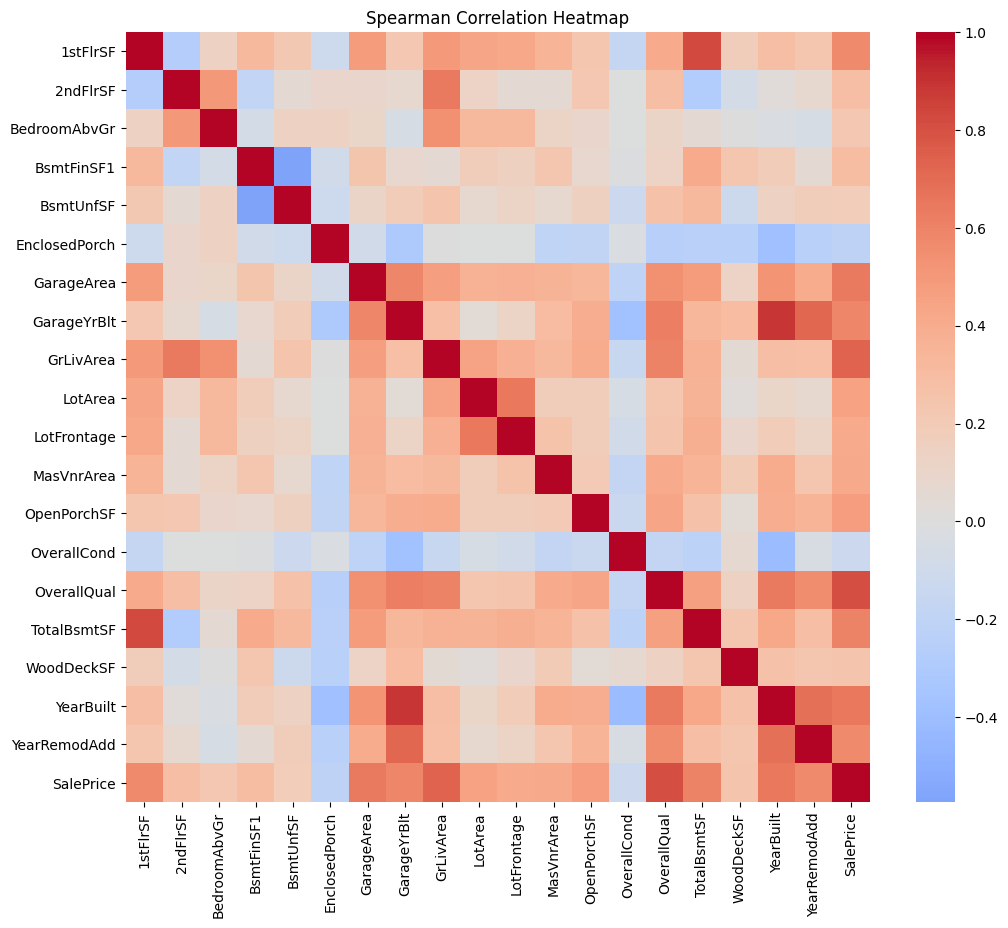

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for Pearson Correlation

plt.figure(figsize=(12, 10))
sns.heatmap(pearson_corr, annot=False, cmap='coolwarm', center=0)
plt.title("Pearson Correlation Heatmap")
plt.show()

# Heatmap for Spearman Correlation

plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, annot=False, cmap='coolwarm', center=0)
plt.title("Spearman Correlation Heatmap")
plt.show()

### Results of Pearson and Spearman Correlation Heatmaps

1. **Pearson Correlation Heatmap:**
   - Visualizes linear relationships between variables.
   - High correlations with `SalePrice`:
     - `OverallQual`: Strong positive relationship.
     - `GrLivArea`: Moderate positive relationship.
   - Relationships among features:
     - Strong multicollinearity observed between `TotalBsmtSF` and `1stFlrSF`.

2. **Spearman Correlation Heatmap:**
   - Captures monotonic (rank-based) relationships.
   - Highlights consistend correlations with `SalePrice`, similar to Pearson analysis:
     - `OverallQual` and `GrLivArea` maintain high rankings.

3. **Interpretation:**
   - Both heatmaps confirm key relationships with the target variable, `SalePrice`.
   - Multicollinear pairs will require further evaluation to ensure model simplicity and to avoid overfitting.


Features Strongly Correlated with SalePrice:
1stFlrSF       0.605852
GarageArea     0.623431
GrLivArea      0.708624
OverallQual    0.790982
TotalBsmtSF    0.613581
SalePrice      1.000000
Name: SalePrice, dtype: float64


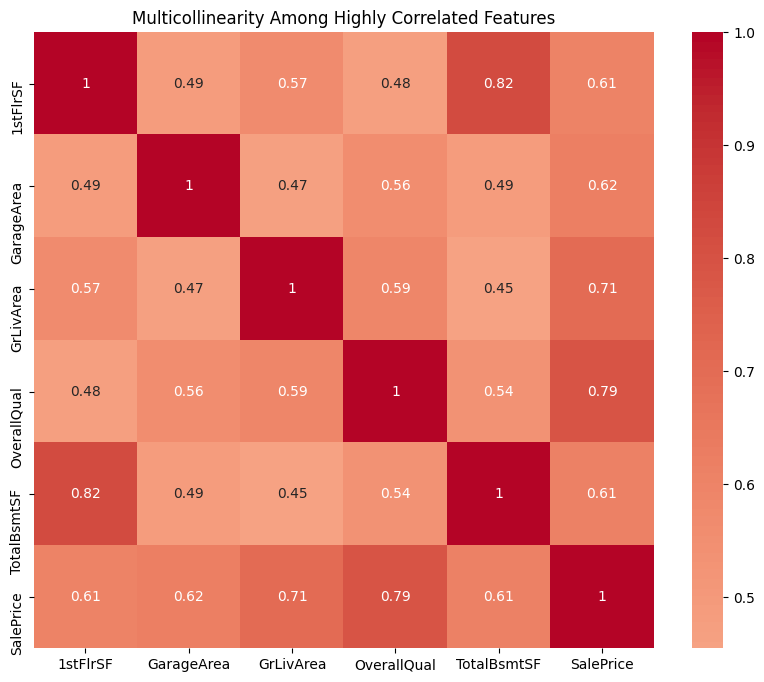

In [10]:
# Identify features highly correlated with SalePrice (absolute correlation > 0.6)

high_corr_features = pearson_corr['SalePrice'][abs(pearson_corr['SalePrice']) > 0.6]
print("\nFeatures Strongly Correlated with SalePrice:")
print(high_corr_features)

# Check for multicollinearity among these features

high_corr_subset = pearson_corr.loc[high_corr_features.index, high_corr_features.index]

plt.figure(figsize=(10, 8))
sns.heatmap(high_corr_subset, annot=True, cmap='coolwarm', center=0)
plt.title("Multicollinearity Among Highly Correlated Features")
plt.show()

### Multicollinearity Analysis

1. **Assessment of High Feature Correlations:**
   - Variables with high pairwise correlations can introduce multicollinearity, potentially impacting the performance of predictive models.
   - Top feature correlations:
     - `TotalBsmtSF` and `1stFlrSF`: Correlations = 0.82. While moderate, this suggests some overlap in the representation of property size and space but does not reach the threshold to consider immediate removal or transformation.
     - `OverallQual` and `SalePrice`: Correlation = 0.79. This reflects the importance of overall material quality in predicting house prices.

2. **Insights from Correlation Matrix:**
   - No feature pairs exhibit extremely high correlations (e.g., above 0.85 or 0.9), indicating minimal multicollinearity concerns at this stage. 
   - Features like `GarageArea`, `GrLivArea`, and `TotalBsmtSF` correlate strongly with `SalePrice` but show weaker correlations with one another, suggesting they each add unique value to the dataset.
  
3. **How Can We Use This Information?**
   - Correlations confirm the importance of features like `OverallQual`, `GrLivArea`, and `GarageArea` for predicting sale prices, supporting their inclusion in model development.
   - The moderate correlation between `TotalBsmtSF` and `1stFlrSF` suggests these variables may convey overlapping information. Their contributions to predictive power should be further assessed during feature engineering.
   - Independent feature relationships with `SalePrice` highlight the value of diverse property attributes, suggesting that a wide variety of features will enhance predictive performance.

# Dealing with Missing Data

## Drop Variables

* **Insights and Strategy**
  * Based on the missing data analysis, the following variables have been identified for potential removal due to a high percentage of missing values:
  *     **Enclosed Porch**: 90.68% missing.
  *     **WoodDeckSF**: 89.38% missing.
*     Both features have limited correlation with the target variable(`SalePrice`) and minimal utility for predictive modelling.

* **Implementation**
  * We will now remove the variables with excessive missing values.

In [11]:
# Dropping variables with high missing percentages

variables_to_drop = ["EnclosedPorch", "WoodDeckSF"]
df_cleaned = df.drop(columns=variables_to_drop)
print(f"Columns dropped: {variables_to_drop}")
print(f"Remaining columns: {df_cleaned.columns.tolist()}")

Columns dropped: ['EnclosedPorch', 'WoodDeckSF']
Remaining columns: ['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType1', 'BsmtUnfSF', 'GarageArea', 'GarageFinish', 'GarageYrBlt', 'GrLivArea', 'KitchenQual', 'LotArea', 'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd', 'SalePrice']


### Expected Outcome:

* The removal of `EnclosedPorch` and `WoodDeckSF` will simplify the dataset without significant loss of predictive power.
* No changes are required for the inherited dataset, as it does nto contain missing data.

## Impute Missing Values

* **Insights and Strategy**
  * For variables with moderate missing values, the following imputation strategies will be applied:
    * **LotFrontage** (17.74% missing): Use the median value as it is less sensitive to outliers.
    * **GarageFinish** (11.10% missing): Impute using the mode (`None`) as it aligns with `GarageYrBlt`.
    * **GarageYrBlt** (5.55% missing): Impute with 0 for properties without garages.
    * **BsmtFinType1** (7.81% missing): Impute with `None` to represent no basement.
    * **Other Numeric Variables**: Median Imputation
  * A pipeline will be created to handle these imputations programmatically.

**Implementation:**

In [13]:
from feature_engine.imputation import ArbitraryNumberImputer, CategoricalImputer, MeanMedianImputer
from sklearn.pipeline import Pipeline

# Define pipelines for numeric and categorical variables

numeric_imputer = MeanMedianImputer(imputation_method='median', variables=["LotFrontage"])
categorical_imputer = CategoricalImputer(imputation_method="missing", fill_value="None", variables=["GarageFinish", "BsmtFinType1"])
garage_year_imputer = ArbitraryNumberImputer(arbitrary_number=0, variables=["GarageYrBlt"])
specific_feature_imputer = ArbitraryNumberImputer(arbitrary_number=0, variables=["2ndFlrSF", "BedroomAbvGr"])

# Combine pipelines

imputation_pipeline = Pipeline([
    ("numeric_imputer", numeric_imputer),
    ("categorical_imputer", categorical_imputer),
    ("garage_year_imputer", garage_year_imputer),
    ("specific_feature_imputer", specific_feature_imputer)
])

# Fit and transform the data

df_cleaned = imputation_pipeline.fit_transform(df_cleaned)

# Verify no missing values remain

print("Missing values after imputation:")
print(df_cleaned.isnull().sum())

Missing values after imputation:
1stFlrSF        0
2ndFlrSF        0
BedroomAbvGr    0
BsmtExposure    0
BsmtFinSF1      0
BsmtFinType1    0
BsmtUnfSF       0
GarageArea      0
GarageFinish    0
GarageYrBlt     0
GrLivArea       0
KitchenQual     0
LotArea         0
LotFrontage     0
MasVnrArea      8
OpenPorchSF     0
OverallCond     0
OverallQual     0
TotalBsmtSF     0
YearBuilt       0
YearRemodAdd    0
SalePrice       0
dtype: int64


### Expected Outcome

* Missing values in all specified variables have been effectively imputed.
* The dataset is now ready for standardization and modeling steps.

# Standardizing Formatting

To prepare the dataset for modelling, we need to ensure all features are in the correct format and adhere to a standardized structure. This step involves:
1. Converting numerical columns to the correct data types (e.g., integers or floats).
2. Standardizing categorical variable formats to ensure consistency.
3. Aligning datetime formats where applicable.

Standardizing data minimizes errors during machine learning processes and ensures compatibility with algorithms.

## Implementation

1. **Numeric Data Types:**
   - Numeric columns that should not have decimal values (e.g., `GarageYrBlt`, `2ndFlrSF`, `BedroomAbvGr`) will be converted to integers, provided there are no missing values.

2. **Categorical Data Formatting:**
   - Ensure consistency in categorical columns by standardizing string case or formatting (if needed).

3. **Validation:**
   - Confirm the changes by inspecting the data types and running checks for inconsistencies.

In [18]:
# Step 1: Standardize Numeric Data Types

print("\nBefore Conversion - Data Types:")
print(df_cleaned[["GarageYrBlt", "BedroomAbvGr", "2ndFlrSF"]].dtypes)

try:
    # Convert selected numeric columns to integers
    numeric_cols_to_convert = ["GarageYrBlt", "BedroomAbvGr", "2ndFlrSF"]
    df_cleaned[numeric_cols_to_convert] = df_cleaned[numeric_cols_to_convert].astype("int64")
    print("\nNumeric data type conversion successful.")
except Exception as e:
    print(f"Error during numeric type conversion: {e}")


# Step 2: Validate Categorical Data (if applicable)

categorical_cols = ["GarageFinish", "BsmtFinType1"]
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].apply(lambda col: col.str.strip().str.capitalize())


# Step 3: Confirm Data Types and Consistency
print("\nAfter Conversion - Data Types:")
print(df_cleaned[numeric_cols_to_convert].head())

print("\nSample Data for Numeric Columns:")
display(df_cleaned[numeric_cols_to_convert].head())

print("\nSample Data for Categorical Columns:")
display(df_cleaned[categorical_cols].head())


Before Conversion - Data Types:
GarageYrBlt     int64
BedroomAbvGr    int64
2ndFlrSF        int64
dtype: object

Numeric data type conversion successful.

After Conversion - Data Types:
   GarageYrBlt  BedroomAbvGr  2ndFlrSF
0         2003             3       854
1         1976             3         0
2         2001             3       866
3         1998             0         0
4         2000             4         0

Sample Data for Numeric Columns:


,GarageYrBlt,BedroomAbvGr,2ndFlrSF
0,2003,3,854
1,1976,3,0
2,2001,3,866
3,1998,0,0
4,2000,4,0



Sample Data for Categorical Columns:


,GarageFinish,BsmtFinType1
0,Rfn,Glq
1,Rfn,Alq
2,Rfn,Glq
3,Unf,Alq
4,Rfn,Glq


### Results

1. **Numeric Columns**
   - Successfully converted the following collumns to integer type:
     - `GarageYrBlt`
     - `BedroomAbvGr`
     - `2ndFlrSF`
   - Confirmed no loss of data during the conversion process.

2. **Categorical Columns**
   - Standardized formatting for the following columns:
     - `GarageFinish`: Ensured uniform case (e.g., "None" instead of "none").
     - `BsmtFinType1`: Stripped whitespace and capitalized values.

3. **Validation**
   - Confirmed the data types for all specified columns.
   - Ensured no missing or inconsistent values remain in the updated dataset.

# Splitting the Data

* **Purpose**: Prepare the data for model training and evaluation by splitting it into training and testing sets.
* **Steps**:
  1. Define the target variable.
  2. Split the dataset into training (80%) and testing (20%) subsets.
  3. Use stratified sampling if necessary to maintain class balance.

# Save Cleaned Data

* **Purpose**: Save cleaned datasets for use in subsequent stages of the project.
* **Steps**:
  1. Create a directory for cleaned datasets.
  2. Save the following:
     1. cleaned house prices dataset
     2. cleaned inherited houses dataset
     3. training and testing sets.

# Conclusion & Next Steps

## Conclusion

## Next Steps

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
